# MNIST and CNN

## MNIST

### Load Dataset

In [1]:
import torchvision.datasets as dsets
import torchvision.transforms as transforms

In [2]:
train_data = dsets.MNIST(root='data/',
                         train=True,
                         transform=transforms.ToTensor(),
                         download=True)

test_data = dsets.MNIST(root='data/',
                        train=False,
                        transform=transforms.ToTensor(),
                        download=True)

C:\Users\slcf\anaconda3\lib\site-packages\torchvision\datasets\mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

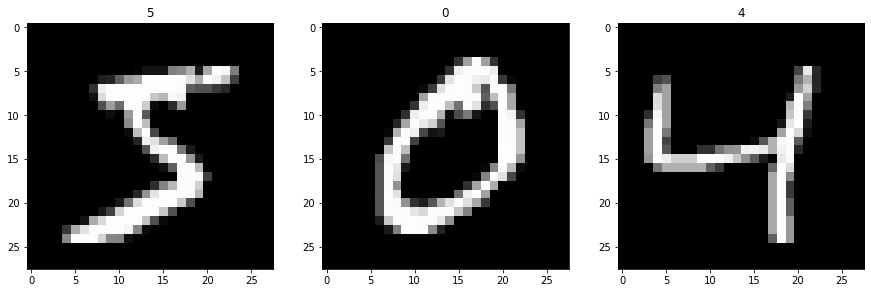

In [4]:
fig = plt.figure(figsize = (15, 5))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

ax1.set_title(train_data.targets[0].item())
ax1.imshow(train_data.data[0,:,:].numpy(), cmap='gray')

ax2.set_title(train_data.targets[1].item())
ax2.imshow(train_data.data[1,:,:].numpy(), cmap='gray')

ax3.set_title(train_data.targets[2].item())
ax3.imshow(train_data.data[2,:,:].numpy(), cmap='gray')

### Make Batches

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader

In [6]:
batch_size = 100

train_loader = DataLoader(dataset=train_data,
                          batch_size=batch_size,
                          shuffle=True)

test_loader = DataLoader(dataset=test_data,
                         batch_size=batch_size,
                         shuffle=False)

In [7]:
batch_images, batch_labels = iter(train_loader).next()
print(batch_labels.numpy(), ", ", len(batch_labels.numpy()))

[3 8 2 6 4 1 0 0 9 1 8 8 5 8 3 8 0 3 2 0 2 0 4 4 4 9 3 0 9 6 8 0 0 2 5 8 4
 5 7 4 2 3 3 0 0 7 7 2 1 0 1 4 5 4 8 9 3 5 1 7 8 2 2 0 4 0 6 5 2 7 3 8 8 1
 8 6 2 5 9 3 7 3 9 2 4 2 2 1 8 0 6 7 6 6 6 0 5 0 7 9] ,  100


## Train & Evaluate MLP

### Train MLP

In [8]:
model = nn.Sequential(
    nn.Linear(784, 512),
    nn.ReLU(),
    nn.Linear(512, 10)
)

In [9]:
loss = nn.CrossEntropyLoss()
# def cross_entropy(input, target, weight=None, size_average=True, ignore_index=-100, reduce=True):

# Args:
#     input: Variable :math:`(N, C)` where `C = number of classes`
#     target: Variable :math:`(N)` where each value is
#         `0 <= targets[i] <= C-1`
#     weight (Tensor, optional): a manual rescaling weight given to each

In [10]:
optimizer = optim.SGD(model.parameters(), lr=0.001)

In [11]:
num_epochs = 5

In [12]:
for epoch in range(num_epochs):
    
    total_batch = len(train_data) // batch_size
    
    for i, (batch_images, batch_labels) in enumerate(train_loader):
        
        X = batch_images.view(-1, 28 * 28)
        Y = batch_labels
        
        pre = model(X)
        cost = loss(pre, Y)
        
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()
        
        if (i+1) % 300 == 0:
            print('Epoch [%d/%d], lter [%d/%d], Loss: %.4f'
                 %(epoch+1, num_epochs, i+1, total_batch, cost.item()))
    
print("Learning Finished!")

Epoch [1/5], lter [300/600], Loss: 2.2238
Epoch [1/5], lter [600/600], Loss: 2.1512
Epoch [2/5], lter [300/600], Loss: 2.0402
Epoch [2/5], lter [600/600], Loss: 1.9955
Epoch [3/5], lter [300/600], Loss: 1.8974
Epoch [3/5], lter [600/600], Loss: 1.8218
Epoch [4/5], lter [300/600], Loss: 1.6634
Epoch [4/5], lter [600/600], Loss: 1.5709
Epoch [5/5], lter [300/600], Loss: 1.4701
Epoch [5/5], lter [600/600], Loss: 1.4216
Learning Finished!


### Evaluate MLP

In [13]:
correct = 0
total = 0

for images, labels in test_data:
    
    images  = images.view(-1, 28 * 28)
    outputs = model(images)
    
    _, predicted = torch.max(outputs.data, 1)
    
    total += 1
    correct += (predicted == labels).sum()
    
print('Accuracy of test images: %f %%' % (100 * float(correct) / total))

Accuracy of test images: 79.870000 %


In [14]:
import random
r = random.randint(0, len(test_data)-1)
X_single_data = test_data.data[r:r + 1].view(-1,28*28).float()
Y_single_data = test_data.targets[r:r + 1]

Label :  [0]
Prediction :  [0]


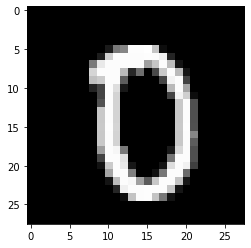

In [15]:
single_pre = model(X_single_data)
plt.imshow(X_single_data.data.view(28,28).numpy(), cmap='gray')

print('Label : ', Y_single_data.data.view(1).numpy())
print('Prediction : ', torch.max(single_pre.data, 1)[1].numpy())

## Train & Evaluate CNN

### Train CNN

In [16]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        
        self.conv_layer = nn.Sequential(
            nn.Conv2d(1, 16, 5),
            nn.ReLU(),
            nn.Conv2d(16, 32, 5),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(32, 64, 5),
            nn.ReLU(),
            nn.MaxPool2d(2, 2)
        )
        
        self.fc_layer = nn.Sequential(
            nn.Linear(64*3*3, 100),
            nn.ReLU(),
            nn.Linear(100, 10)
        )       
        
    def forward(self,x):
        out = self.conv_layer(x)
        out = out.view(-1,64*3*3)
        out = self.fc_layer(out)

        return out

In [17]:
model = CNN().cuda()

In [18]:
loss = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [19]:
num_epochs = 3

In [20]:
for epoch in range(num_epochs):

    total_batch = len(train_data) // batch_size

    for i, (batch_images, batch_labels) in enumerate(train_loader):

        X = batch_images.cuda()
        Y = batch_labels.cuda()

        pre = model(X)
        cost = loss(pre, Y)

        optimizer.zero_grad()
        cost.backward()
        optimizer.step()

        if (i+1) % 300 == 0:
            print('Epoch [%d/%d], lter [%d/%d], Loss: %.4f'
                 %(epoch+1, num_epochs, i+1, total_batch, cost.item()))

Epoch [1/3], lter [300/600], Loss: 1.7904
Epoch [1/3], lter [600/600], Loss: 0.3767
Epoch [2/3], lter [300/600], Loss: 0.2303
Epoch [2/3], lter [600/600], Loss: 0.1229
Epoch [3/3], lter [300/600], Loss: 0.1896
Epoch [3/3], lter [600/600], Loss: 0.2204


### Evaulate CNN

In [21]:
correct = 0
total = 0

for images, labels in test_loader:
    
    images = images.cuda()
    outputs = model(images)
    
    _, predicted = torch.max(outputs.data, 1)
    
    total += labels.size(0)
    correct += (predicted == labels.cuda()).sum()
    
print('Accuracy of test images: %f %%' % (100 * float(correct) / total))

Accuracy of test images: 96.320000 %


## Save and Load Model

### Save Model

In [4]:
torch.save(model, "sample1.pth")

C:\Users\slcf\Anaconda3\lib\site-packages\torch\serialization.py:360: UserWarning: Couldn't retrieve source code for container of type CNN. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


In [5]:
torch.save(model.state_dict(), "sample2.pth")

### Load Model

In [6]:
torch.load("sample1.pth")

CNN(
  (conv_layer): Sequential(
    (0): Conv2d(3, 32, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc_layer): Sequential(
    (0): Linear(in_features=1600, out_features=100, bias=True)
    (1): ReLU()
    (2): Linear(in_features=100, out_features=10, bias=True)
  )
)

In [7]:
# Class가 변경되거나 없어지면 무조건 에러 발생
del CNN
torch.load("sample1.pth")

AttributeError: Can't get attribute 'CNN' on <module '__main__'>

In [8]:
# Class가 변경되거나 없어져도 불러올 수 있음. 최악의 경우에도 유추 가능.
torch.load("sample2.pth")

OrderedDict([('conv_layer.0.weight',
              tensor([[[[-0.0990,  0.1003,  0.0784, -0.0463,  0.0550],
                        [ 0.0777,  0.0056, -0.0169,  0.0741,  0.0613],
                        [-0.1140, -0.0130, -0.0947,  0.0434,  0.0541],
                        [ 0.0888, -0.1151, -0.0670, -0.0473,  0.1092],
                        [-0.0753, -0.0176, -0.0103, -0.0004,  0.0531]],
              
                       [[ 0.0235, -0.1059, -0.1046,  0.0692, -0.0182],
                        [-0.0098,  0.0274, -0.0665, -0.0386, -0.0824],
                        [-0.0674, -0.0335, -0.0380, -0.0557,  0.1107],
                        [-0.1061,  0.0850, -0.0545,  0.0390, -0.0513],
                        [-0.0689,  0.0334, -0.0873, -0.0368,  0.0655]],
              
                       [[-0.0539, -0.1048,  0.0259, -0.0206,  0.0901],
                        [ 0.1142,  0.0408,  0.0435, -0.0873,  0.0765],
                        [-0.0734,  0.0803,  0.0538,  0.0710,  0.1020],
        

In [9]:
# 물론 최종적으로는 Class가 있어야함.
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        
        self.conv_layer = nn.Sequential(
            nn.Conv2d(3, 32, 5),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
            nn.Conv2d(32, 64, 5),
            nn.ReLU(),
            nn.MaxPool2d(2,2)
        )

        self.fc_layer = nn.Sequential(
            nn.Linear(64*5*5, 100),
            nn.ReLU(),
            nn.Linear(100, 10)              
        )
        
    def forward(self, x):
        out = self.conv_layer(x)
        out = out.view(-1, 64*5*5)
        out = self.fc_layer(out)
        
        return out
    
model = CNN().cuda()
model.load_state_dict(torch.load("sample2.pth"))

<All keys matched successfully>

In [10]:
model

CNN(
  (conv_layer): Sequential(
    (0): Conv2d(3, 32, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc_layer): Sequential(
    (0): Linear(in_features=1600, out_features=100, bias=True)
    (1): ReLU()
    (2): Linear(in_features=100, out_features=10, bias=True)
  )
)